In [3]:
import tensorflow as tf
import numpy
print(tf.__version__)
!nvidia-smi

1.15.0
Tue Nov  5 02:48:19 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|

In [4]:
m1 = tf.constant([[3, 4]])
m2 = tf.constant([[4], [7]])
result = tf.matmul(m1, m2)
print(result)

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


In [6]:
with tf.Session() as sess:
  res = sess.run(result)
print(res)

[[40]]


In [12]:
# Tensorflow的变量

x = tf.Variable([1, 2])
c = tf.constant([3, 3])

# 减法操作
sub = tf.subtract(x, c)
add = tf.add(x, c)

with tf.Session() as sess:
  init = tf.global_variables_initializer()
  sess.run(init)
  _sub = sess.run(sub)
  _add = sess.run(add)

print(_sub)
print(_add)

[-2 -1]
[4 5]


In [14]:

# 创建一个变量，初始化为0
state = tf.Variable(0, name='counter')
nv = tf.add(state, 1)
# 赋值操作，将nv的值赋予state
update = tf.assign(state, nv)
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  sess.run(state)
  for _ in range(5):
    sess.run(update)
    print(sess.run(state))

1
2
3
4
5


In [15]:
# fech_and_feed

input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)

add = tf.add(input2, input3)
mul = tf.multiply(input1, add)

with tf.Session() as sess:
  res = sess.run([mul, add])
  print(res)

[21.0, 7.0]


In [19]:
_input1 = tf.placeholder(tf.float32)
_input2 = tf.placeholder(tf.float32)
output = tf.multiply(_input1, _input2)

with tf.Session() as sess:
  res = sess.run(output, feed_dict={_input1: .8, _input2: 2.0})
  print(res)
  res = sess.run(output, feed_dict={_input1: [.8,0.9], _input2: [2.0,0.8]})
  print(res)

1.6
[1.6        0.71999997]


In [20]:
# 构造数据
x_data = numpy.random.rand(100)
y_data = x_data * 0.1 + 0.2

# 构造线性模型
b = tf.Variable(0.0)
k = tf.Variable(0.0)
y = k * x_data + b

# 构造损失函数
loss = tf.reduce_mean(tf.square(y_data - y))
# 使用梯度下降优化算法
optimizer = tf.train.GradientDescentOptimizer(0.2)

# 最小化loss，即训练
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

# 训练的本质就是求取方程的解
with tf.Session() as sess:
  sess.run(init)
  for step in range(200):
    sess.run(train)
    if step %20 == 0:
      print(sess.run([k, b]))

[0.05676381, 0.1012787]
[0.10599134, 0.19662535]
[0.10382308, 0.19784667]
[0.1024395, 0.19862597]
[0.10155665, 0.19912323]
[0.100993276, 0.19944054]
[0.100633815, 0.199643]
[0.10040445, 0.1997722]
[0.10025807, 0.19985464]
[0.10016468, 0.19990724]


(200,)
(200, 1)


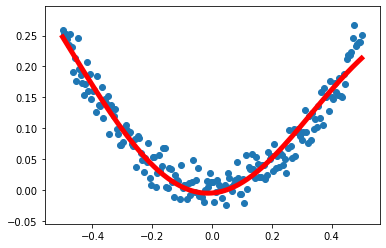

In [34]:
import matplotlib.pyplot as plt

# 生成200数据的数组
x_data = numpy.linspace(-0.5, 0.5, 200)
print(x_data.shape)
# numpy.newaxis表示None，表示将x_data从数组转换成一个n*1的矩阵
x_data = x_data[:, numpy.newaxis]
print(x_data.shape)
# 也可以采用reshape
# print(x_data.reshape(-1, 1).shape)

# 生成正态分布的随机值，分布于-0.02~0.02之间，数量为x_data.shape的大小
noise = numpy.random.normal(0, 0.02, x_data.shape)

y_data = numpy.square(x_data) + noise

# 构造方程式(神经网络)

x = tf.placeholder(tf.float32, shape=[None, 1], name='input_x')
y = tf.placeholder(tf.float32, shape=[None, 1], name='output_y')

w1 = tf.Variable(tf.random.normal(shape=[1, 10]), name='w1')
b1 = tf.Variable(tf.zeros(shape=[1, 10]), name='b1')

layer1 = tf.matmul(x, w1) + b1
layer1 = tf.nn.tanh(layer1)

w2 = tf.Variable(tf.random_normal(shape=[10, 1]), name='w2')
b2 = tf.Variable(tf.zeros(shape=[1, 1]), name='b2')

layer2 = tf.matmul(layer1, w2) + b2

prediction = tf.nn.tanh(layer2)

loss = tf.reduce_mean(tf.square(y - prediction))

train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for _ in range(2000):
    sess.run(train, feed_dict={x:x_data, y:y_data})
  predict_val = sess.run(prediction, feed_dict={x: x_data})
  plt.figure()
  plt.scatter(x_data, y_data)
  plt.plot(x_data, predict_val, 'r-', lw=5)
  plt.show()